# Alzheimer MRI Image Classification Using CNN

## Introduction
This project aims to classify MRI images of patients into four categories based on the presence and severity of Alzheimer's disease. The categories include:

- **Non-Demented**  
- **Very Mild Demented**  
- **Mild Demented**  
- **Moderate Demented** 


We will use **Convolutional Neural Networks (CNN)** to train a deep learning model for this classification task. 

📌 *This notebook serves as a step-by-step guide for Alzheimer’s MRI image classification using deep learning techniques.*


---

## **1. Importing Required Libraries**  
Before we start, we need to import essential libraries for data handling, visualization, and deep learning. These libraries include:  
- **NumPy & Pandas** for numerical operations and data handling.  
- **Matplotlib & Seaborn** for data visualization.  
- **Plotly** for interactive visualizations.  
- **Scikit-Learn** for data preprocessing and model evaluation.  
- **TensorFlow & Keras** for building and training the deep learning model.  

---

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report 

import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded



## **2. Loading the Dataset**  
The dataset consists of MRI images categorized into four classes. The images are stored in structured directories, so we programmatically extract file paths and their corresponding labels to create a structured DataFrame.  

Steps involved:  
- Define the **dataset path**.  
- Iterate through each category folder to extract image file paths.  
- Store the image paths along with their labels in a Pandas DataFrame.  
- Repeat the process for both **training** and **testing** datasets.  

---

In [52]:
data_dir = "/Users/ark/20 Day Challenge/Day 4/Combined_Dataset"

target_folder='train'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)  

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
train_df = pd.concat([f_series, l_series], axis=1)

In [54]:
data_dir = "/Users/ark/20 Day Challenge/Day 4/Combined_Dataset"
target_folder='test'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)  

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
test_df = pd.concat([f_series, l_series], axis=1)

In [62]:

train_df

,filepath,labels
0,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
1,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
2,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
3,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
4,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
...,...,...
10235,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,Mild Impairment
10236,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,Mild Impairment
10237,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,Mild Impairment
10238,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,Mild Impairment


In [64]:
test_df

,filepath,labels
0,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
1,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
2,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
3,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
4,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,No Impairment
...,...,...
1274,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,Mild Impairment
1275,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,Mild Impairment
1276,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,Mild Impairment
1277,/Users/ark/20 Day Challenge/Day 4/Combined_Dat...,Mild Impairment


## **2. Visualizing Training Data Distribution**
- Count the number of images in each of the classes in the training set folder


This code snippet visualizes the distribution of image labels (classes) in the training dataset using a bar plot.

**Key Components:**
This code generates a bar plot that shows the distribution of image classes in the training data.  The x-axis represents the different classes (labels), and the y-axis represents the number of images belonging to each class.  This visualization is crucial for understanding if the dataset is balanced (roughly equal number of samples per class) or imbalanced.  Class imbalance can affect model performance, and this visualization helps identify potential issues that might need to be addressed (e.g., using techniques like data augmentation or weighted loss functions).

---

In [67]:
count_train=train_df["labels"].value_counts()
count_train

labels
No Impairment           2560
Moderate Impairment     2560
Very Mild Impairment    2560
Mild Impairment         2560
Name: count, dtype: int64

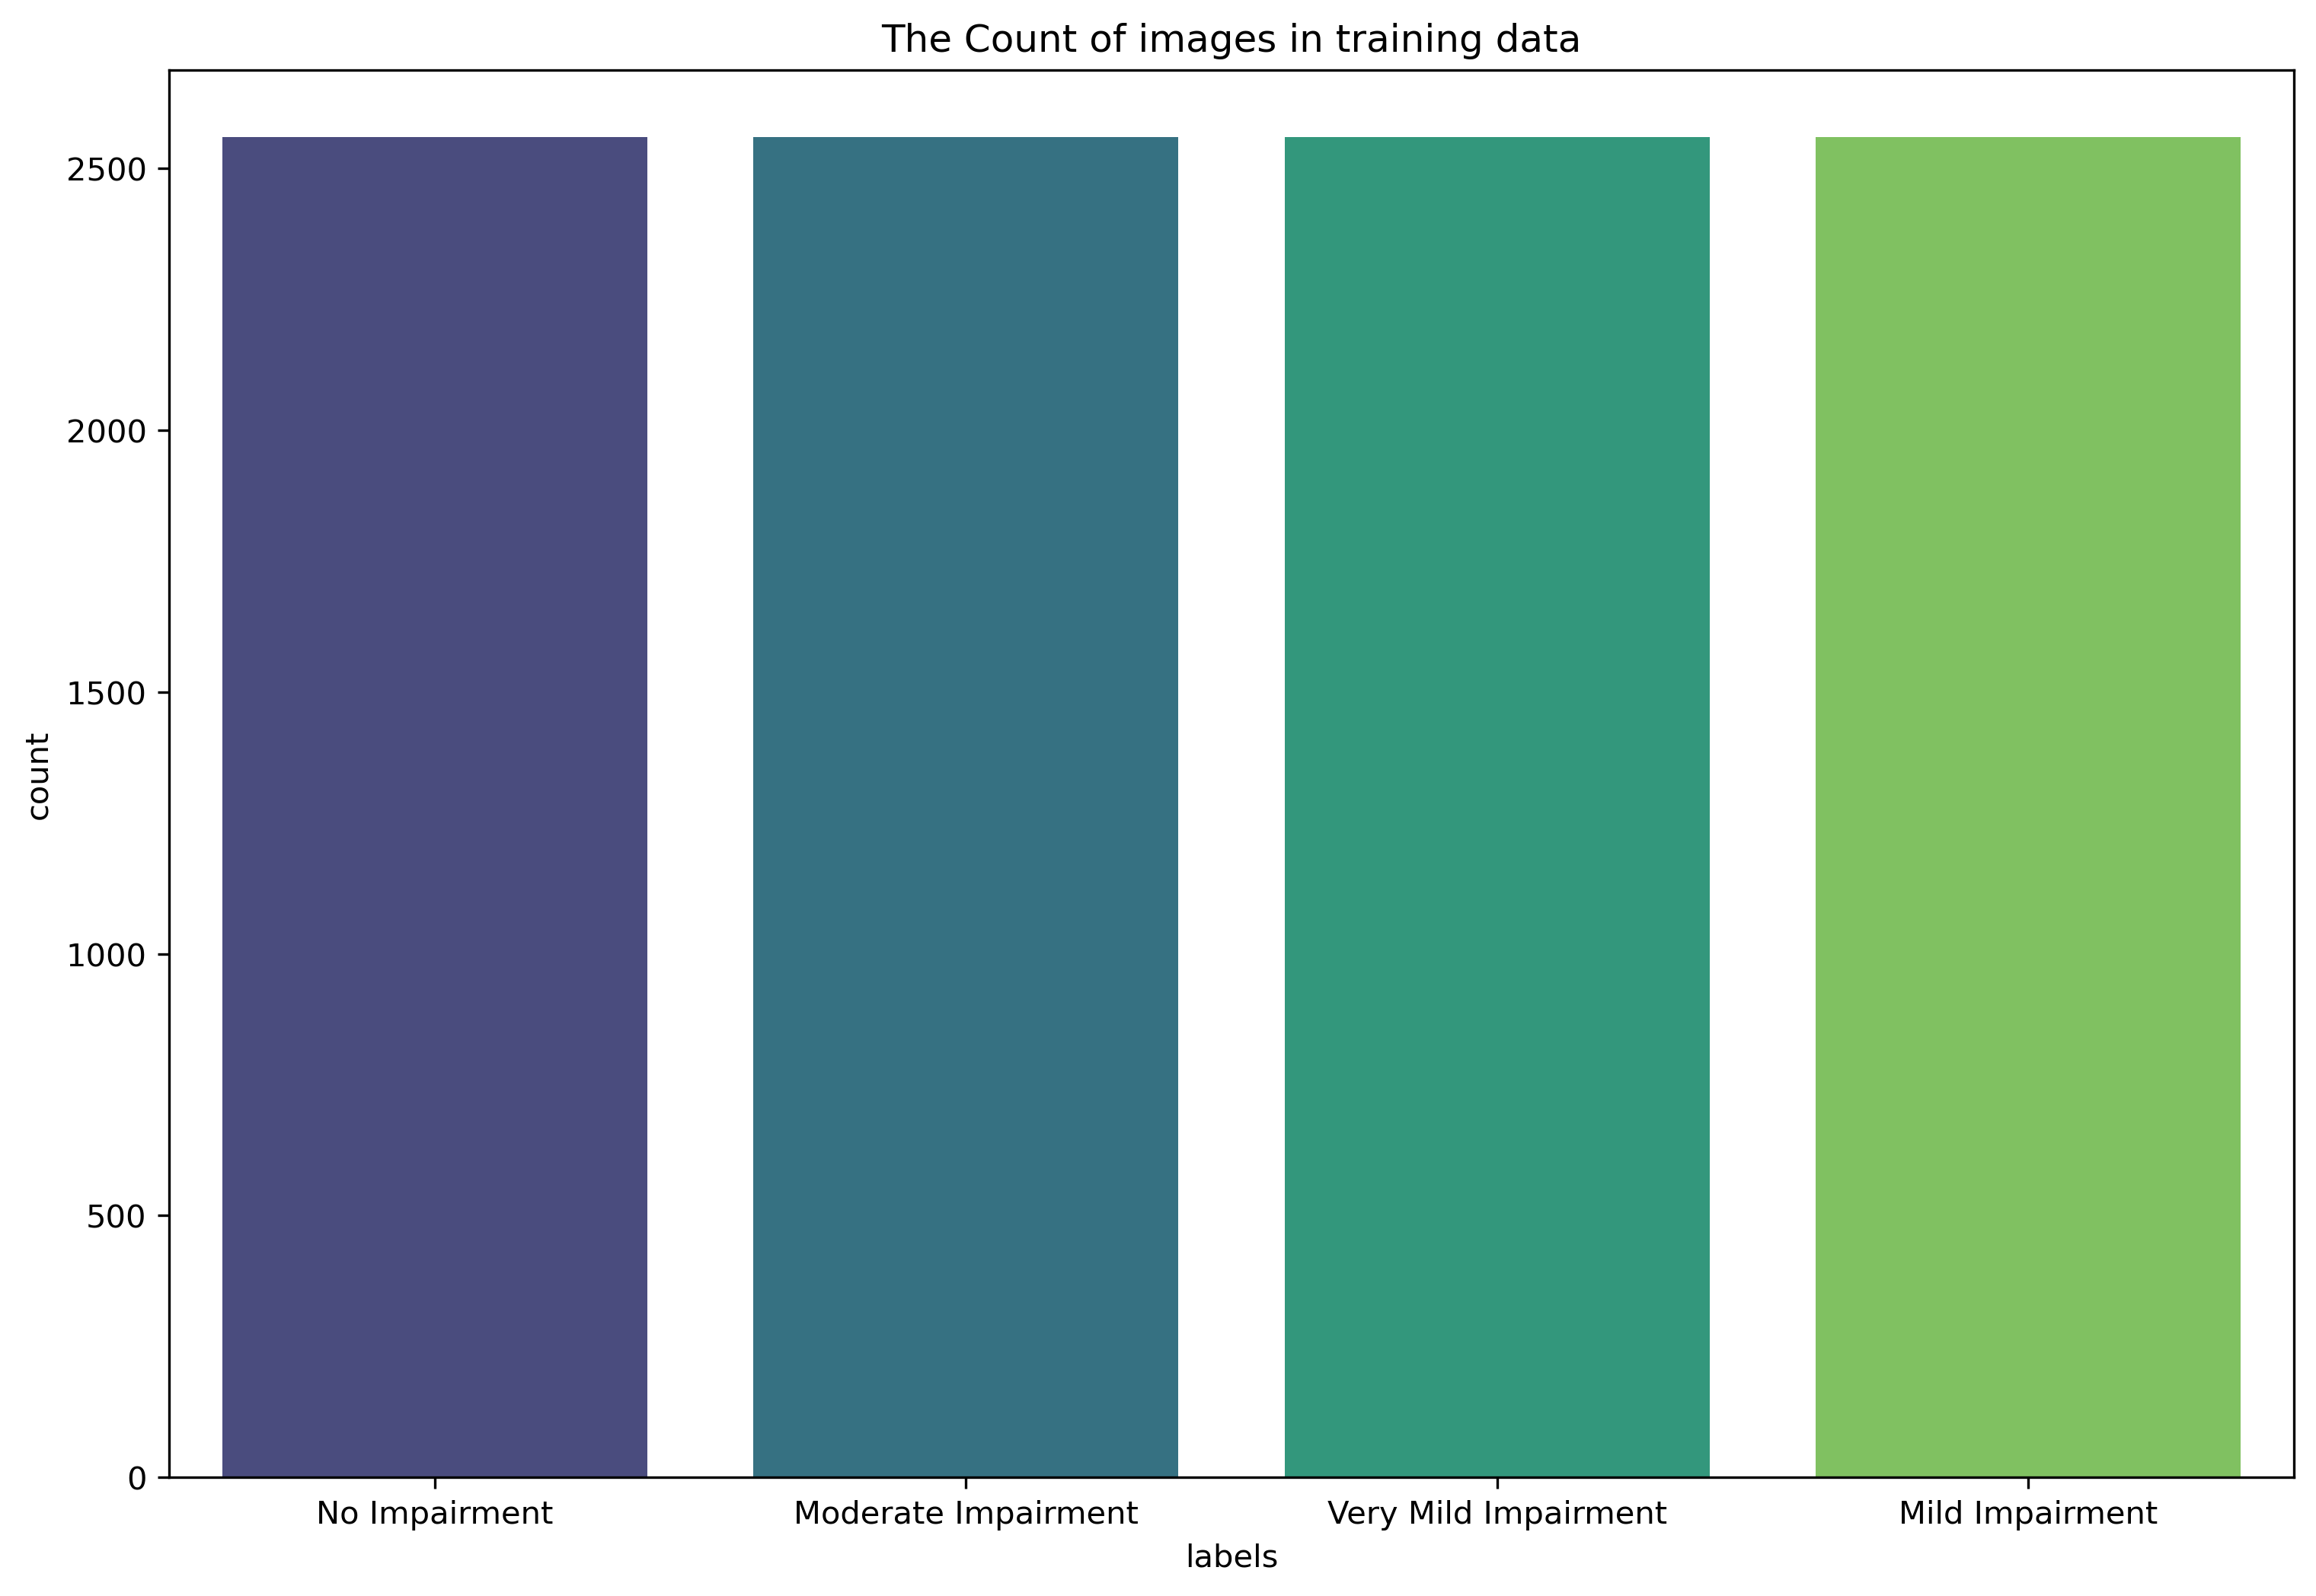

In [69]:
plt.figure(figsize=(12,8))
sns.barplot(x=count_train.index,y=count_train.values,palette='viridis')
plt.title('The Count of images in training data')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

- Count the number of images in the test set for each of the classes

In [73]:
count_test=test_df["labels"].value_counts()
count_test

labels
No Impairment           640
Very Mild Impairment    448
Mild Impairment         179
Moderate Impairment      12
Name: count, dtype: int64

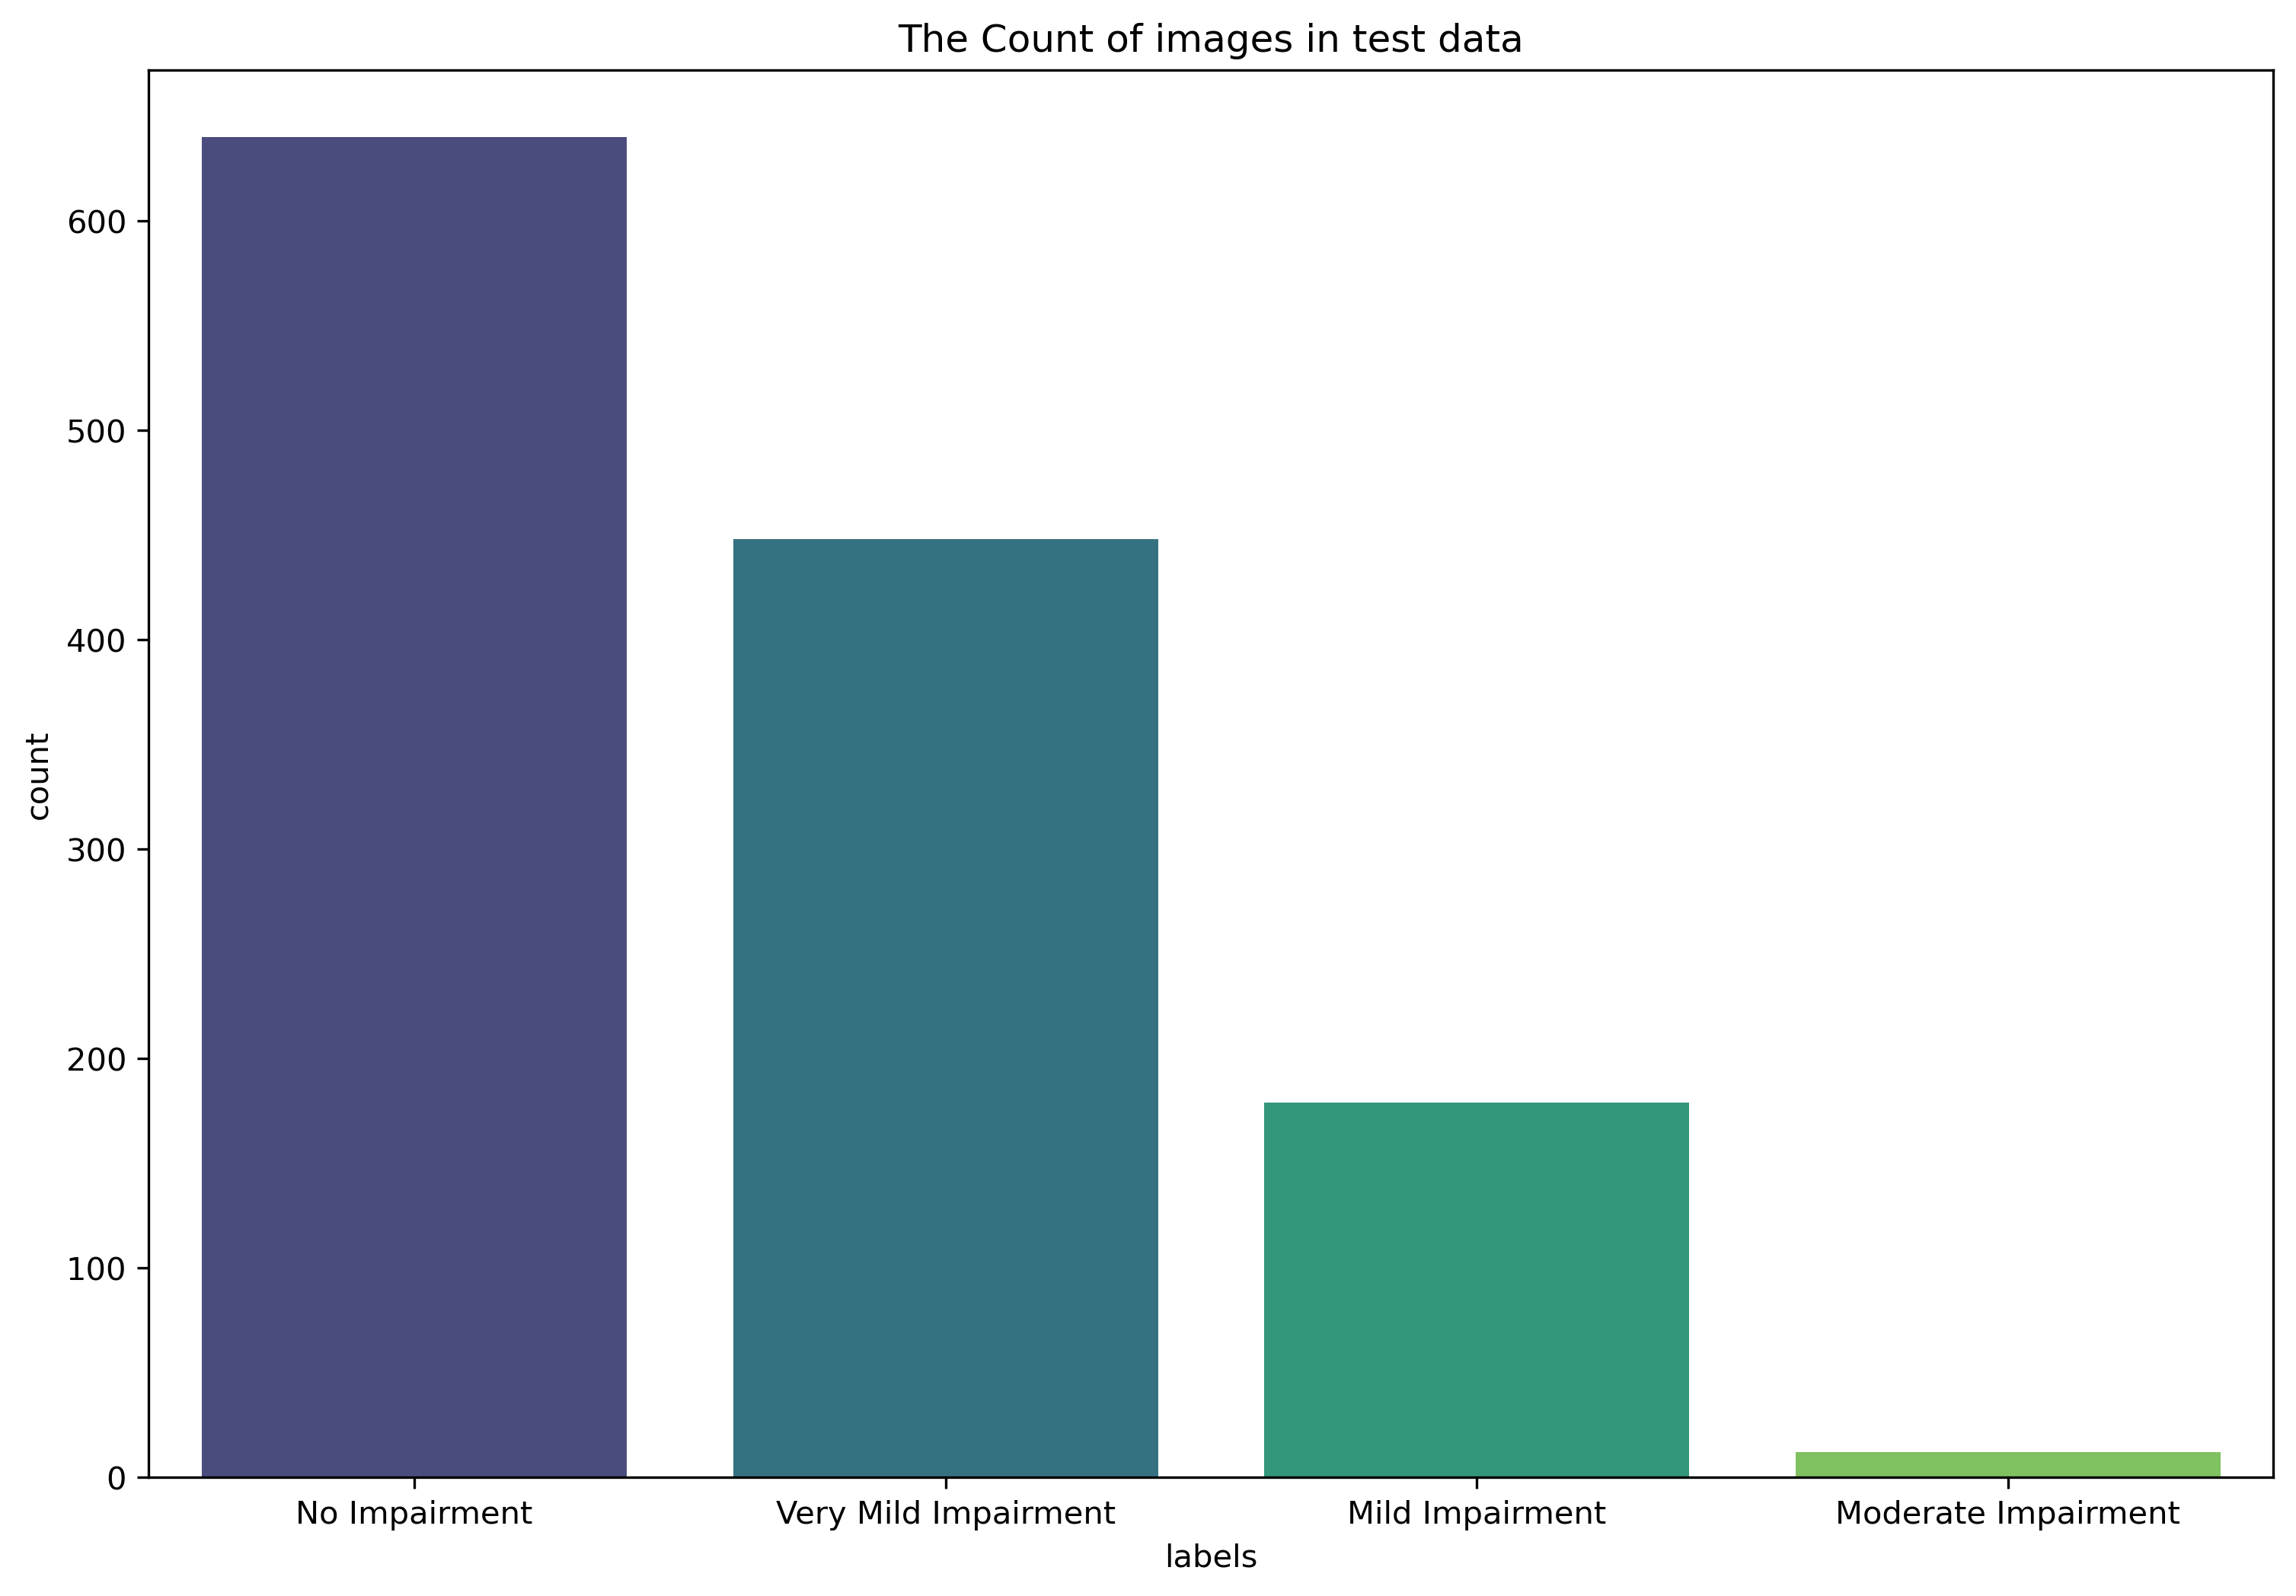

In [75]:
plt.figure(figsize=(12,8))
sns.barplot(x=count_test.index,y=count_test.values,palette='viridis')
plt.title('The Count of images in test data')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

## 📌 **3. Splitting the Data**  

To ensure a balanced distribution of classes in both training and validation sets, we perform a **stratified split** using `train_test_split()`.  

- **`test_size=0.2`** → 20% of the data is allocated for validation.  
- **`stratify=strat`** → Maintains the same class proportions as the original dataset.  
- **`random_state=42`** → Ensures reproducibility of results.  

After splitting, we print the shapes of the training and validation datasets to confirm the split. 


In [78]:
strat=train_df['labels']
train_df,valid_df=train_test_split(train_df,test_size=0.2,random_state=42,stratify=strat)

print(train_df.shape)
print(valid_df.shape)

(8192, 2)
(2048, 2)


---
## **4 Data Augmentation**  
Deep learning models require a significant amount of data for better generalization. To overcome data limitations, we apply **data augmentation** techniques such as:  
- Rotation  
- Zooming  
- Flipping  
- Brightness adjustments  

These transformations help the model learn robust features and improve its performance. 

---

In [81]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
gen = ImageDataGenerator()

train_gen = gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 8192 validated image filenames belonging to 4 classes.
Found 2048 validated image filenames belonging to 4 classes.
Found 1279 validated image filenames belonging to 4 classes.


## **5. Displaying Sample Images**

This code snippet displays a grid of 16 sample images from the training data along with their corresponding class labels. This allows you to visually inspect the data and verify that the images are being loaded and labeled correctly.  It's a useful step for data exploration and ensuring the input data is in the expected format.  The normalization of pixel values is important for proper image display.

---

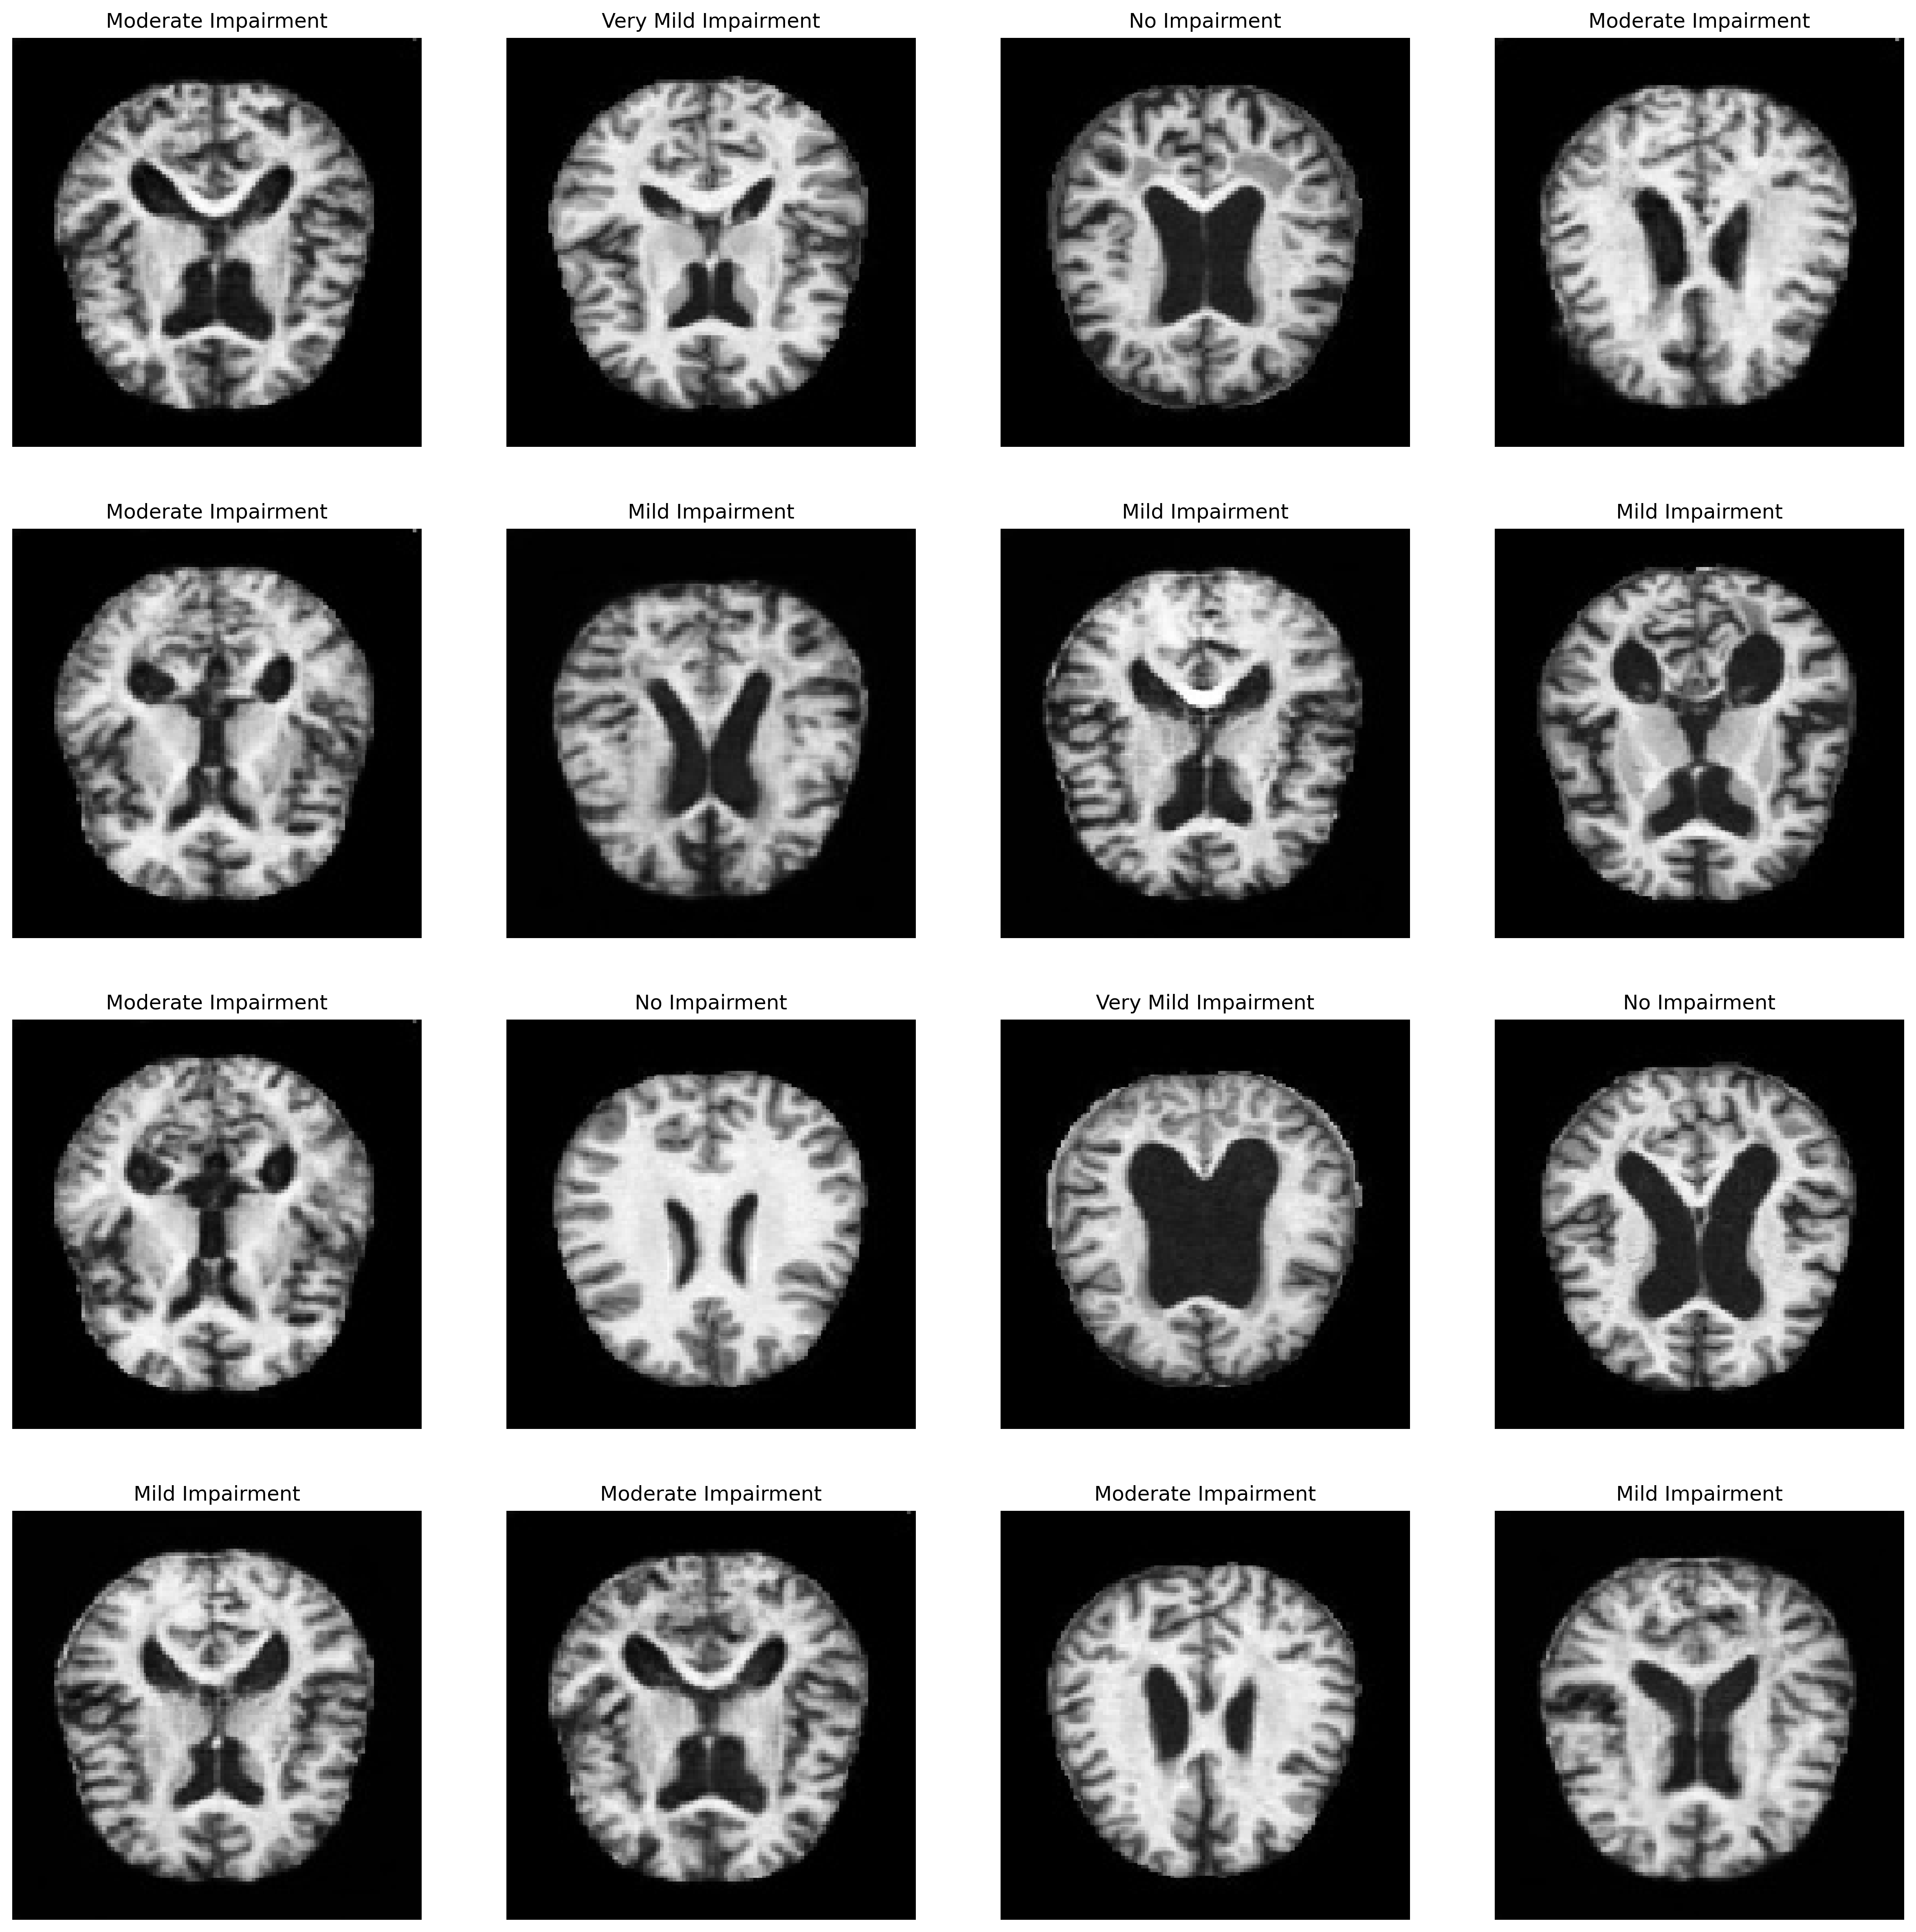

In [84]:
g_dict = train_gen.class_indices    
classes = list(g_dict.keys())      
images, labels = next(train_gen)     

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255      
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

## **6. Building the CNN Model**  

This code defines a Convolutional Neural Network (CNN) model for MRI image classification using transfer learning with TensorFlow/Keras.  It utilizes the pre-trained EfficientNetV2B0 model as a base, removing its top classification layers and replacing them with custom layers tailored for the MRI classification task.

**Key Components:**

*   **Transfer Learning:** Employs EfficientNetV2B0 pre-trained on ImageNet to leverage learned features.
*   **Base Model:** `EfficientNetV2B0(include_top=False, weights="imagenet", input_shape=(224,224,3))` - Loads the pre-trained model without its classification head, setting the input shape for MRI images (224x224x3).  Note: The 3 channels might need adjustment if your MRI images are grayscale.
*   **Custom Layers:**
    *   `Flatten()`: Converts the convolutional output to a 1D vector.
    *   `Dense(256, activation='relu')`: Fully connected layer with 256 neurons and ReLU activation.
    *   `Dropout(0.2)`: Dropout layer for regularization.
    *   `Dense(128, activation='relu')`: Another fully connected layer with 128 neurons and ReLU activation.
    *   `Dense(4, activation='softmax')`: Output layer with 4 neurons (for 4 classes) and softmax activation for probability distribution.
*   **Compilation:** `model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])` - Uses Adamax optimizer, categorical cross-entropy loss (for multi-class), and accuracy as the evaluation metric.

---

In [87]:
base_model=keras.applications.EfficientNetV2B0(include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))
model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
])
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [89]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,056,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,009,300 (83.96 MB)

 Trainable params: 21,948,692 (83.73 MB)

 Non-trainable params: 60,608 (236.75 KB)

## **7. Model Training with Early Stopping**

This code snippet trains the previously defined CNN model (`model`) using a generator (`train_gen`) for training data and another generator (`valid_gen`) for validation data.  It incorporates early stopping to prevent overfitting and optimize training time.

**Key Components:**
The code trains the model for a maximum of 100 epochs, but training will stop automatically if the validation loss doesn't improve for 5 consecutive epochs.  The model's weights from the best epoch (lowest validation loss) are restored, ensuring the best performing model is saved. The training history is stored in the `history` variable, which can be used to plot training curves (loss and accuracy) and analyze the training process.

---

In [92]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(train_gen,epochs=100,validation_data=valid_gen,shuffle=False,
                  callbacks=[early_stopping],validation_steps= None)

Epoch 1/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 405s 754ms/step - accuracy: 0.7050 - loss: 0.9567 - val_accuracy: 0.8799 - val_loss: 0.2962
Epoch 2/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 381s 743ms/step - accuracy: 0.8903 - loss: 0.2737 - val_accuracy: 0.9282 - val_loss: 0.1727
Epoch 3/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 387s 756ms/step - accuracy: 0.9535 - loss: 0.1248 - val_accuracy: 0.9717 - val_loss: 0.0817
Epoch 4/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 376s 734ms/step - accuracy: 0.9766 - loss: 0.0779 - val_accuracy: 0.9727 - val_loss: 0.0775
Epoch 5/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 375s 733ms/step - accuracy: 0.9895 - loss: 0.0319 - val_accuracy: 0.9648 - val_loss: 0.1132
Epoch 6/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 375s 733ms/step - accuracy: 0.9843 - loss: 0.0476 - val_accuracy: 0.9819 - val_loss: 0.0599
Epoch 7/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 366s 714ms/step - accuracy: 0.9903 - loss: 0.0328 - val_accuracy: 0.9707 - val_loss: 0.0983
Epoch 8/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 317s 620ms/step - accuracy: 

## **8. Plotting Training History**

This code snippet visualizes the training history of the model, plotting the training and validation loss and accuracy over the epochs. It highlights the epochs with the best validation loss and accuracy.

**Key Components:**
This code generates two plots: one showing the training and validation loss over epochs, and the other showing the training and validation accuracy.  The plots visually represent the model's learning progress and help identify potential issues like overfitting.  Highlighting the best epochs for validation loss and accuracy makes it easy to see the model's optimal performance during training.

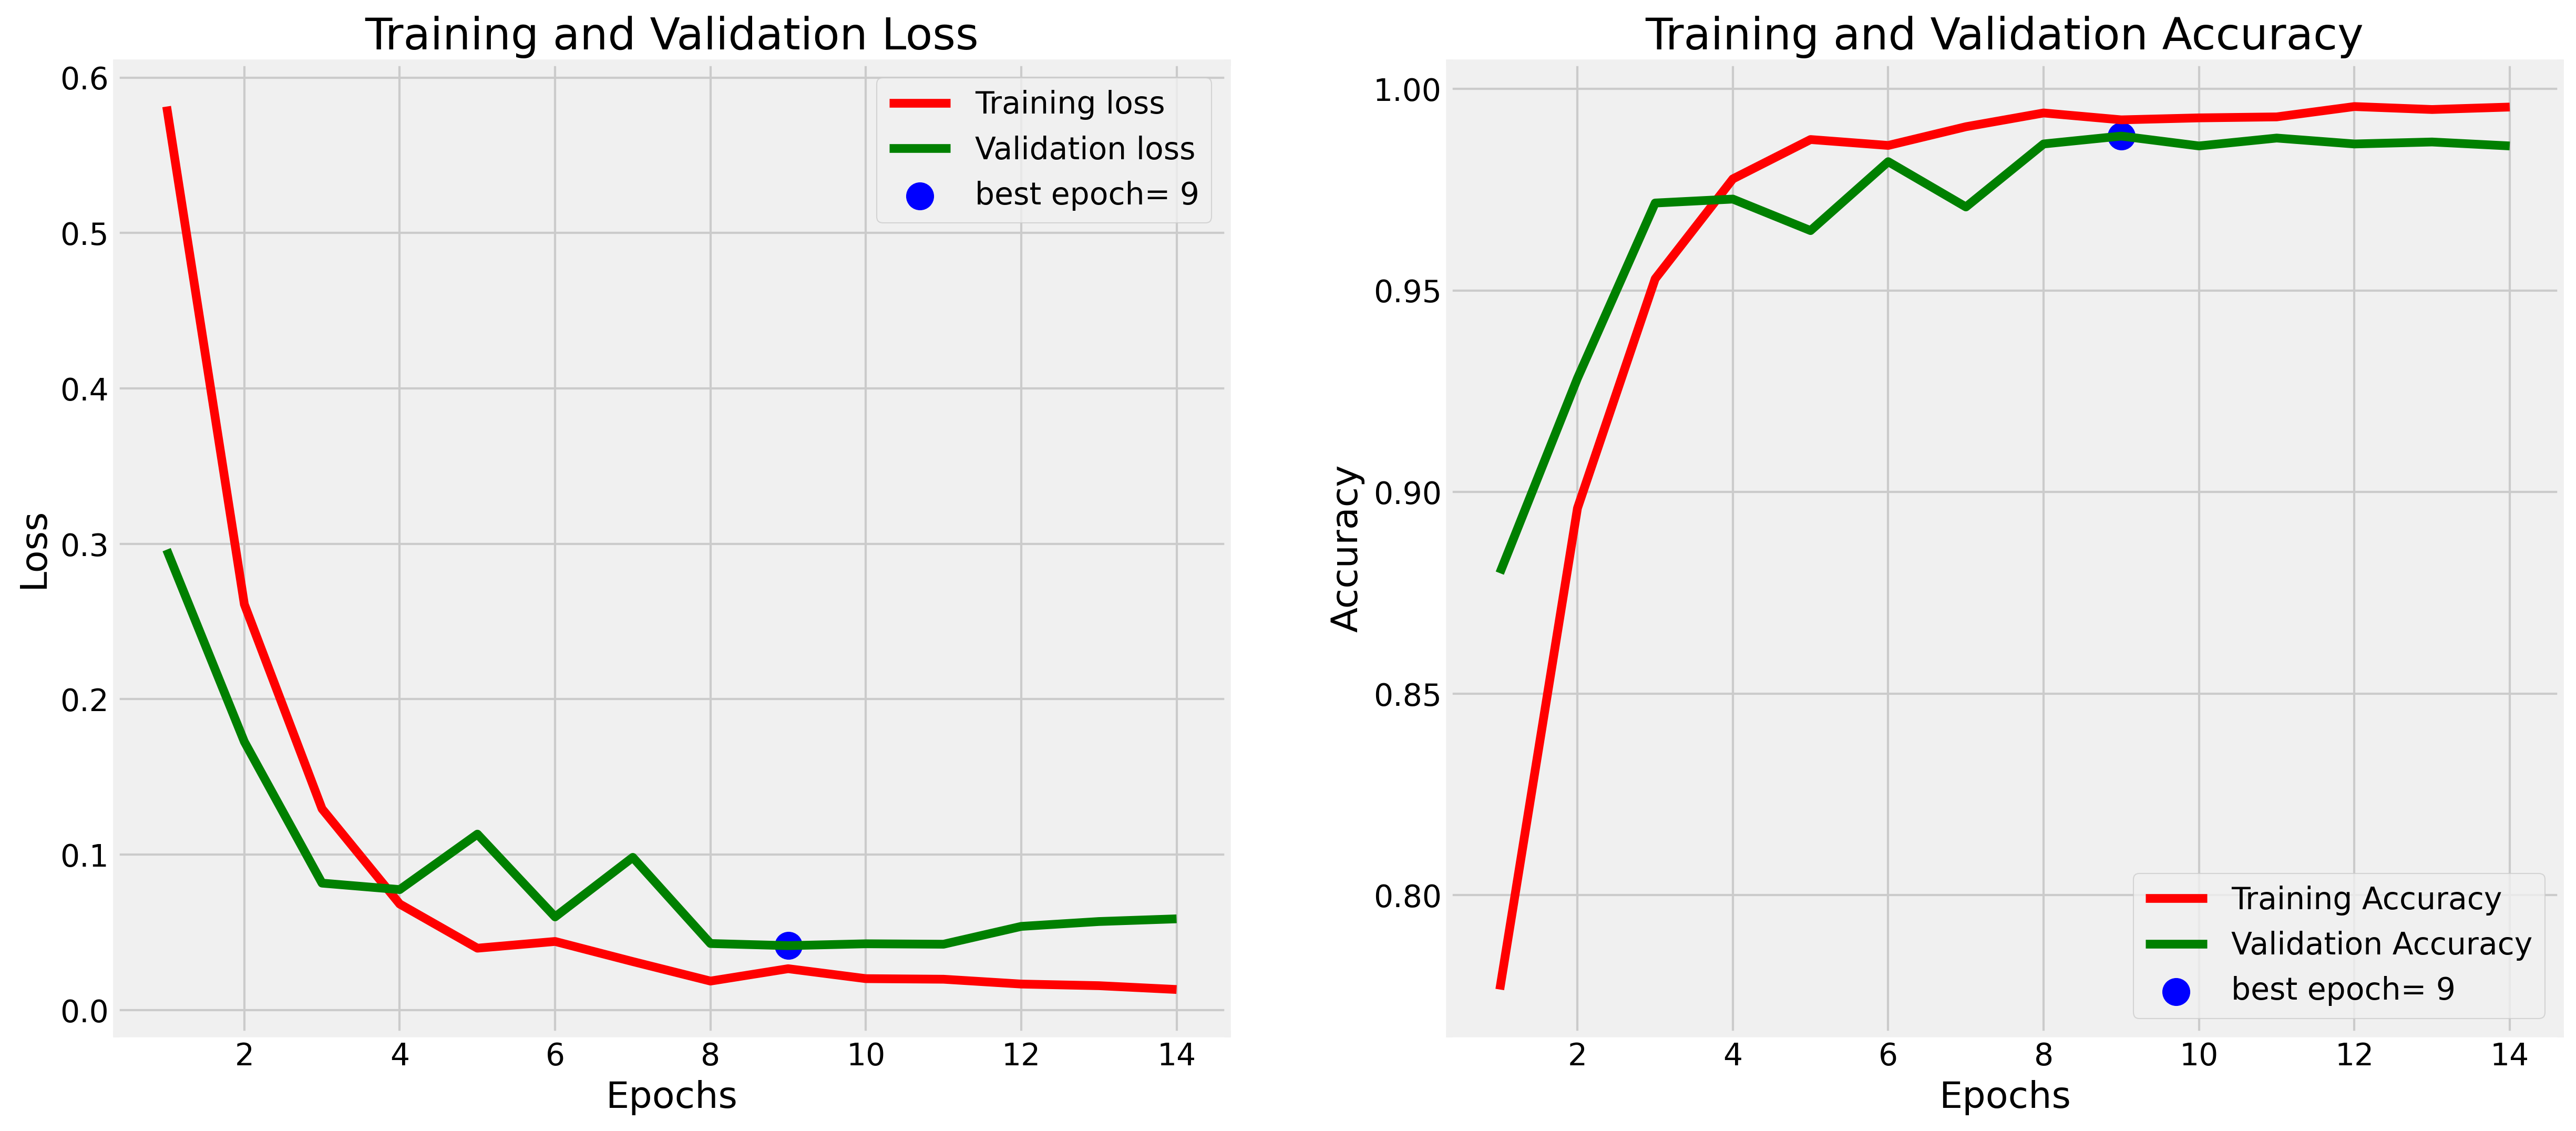

In [94]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

## **9. Model Evaluation and Prediction**

This code evaluates the trained model on the training, validation, and test datasets and then makes predictions on the test set.

**Key Components:**
This code evaluates the trained model on all datasets to assess its performance. It intelligently calculates a suitable batch size for testing and then prints the loss and accuracy metrics.  Finally, it uses the trained model to predict the class labels for the test dataset and stores the predicted labels (`y_pred`).  These predictions can then be used for further analysis, like calculating metrics such as precision, recall, F1-score, or generating a confusion matrix.

---

In [96]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1279/1279 ━━━━━━━━━━━━━━━━━━━━ 59s 46ms/step - accuracy: 0.9999 - loss: 5.2742e-04  
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9885 - loss: 0.0407  
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9776 - loss: 0.0923    
Train Loss:  0.0006181896314956248
Train Accuracy:  0.9998779296875
--------------------
Valid Loss:  0.04145645722746849
Valid Accuracy:  0.98828125
--------------------
Test Loss:  0.09323535859584808
Test Accuracy:  0.9773260354995728


In [99]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step


## **10. Confusion Matrix Visualization**

This code snippet generates and displays a confusion matrix to visualize the performance of the classification model on the test data.

**Key Components:**
This code visualizes the model's performance on the test set using a confusion matrix. The heatmap provides a clear representation of how many samples from each class were correctly and incorrectly classified. The annotations within the matrix show the counts, and the color intensity reflects the magnitude of these counts. This visualization is essential for understanding the model's strengths and weaknesses and identifying potential areas for improvement.

---

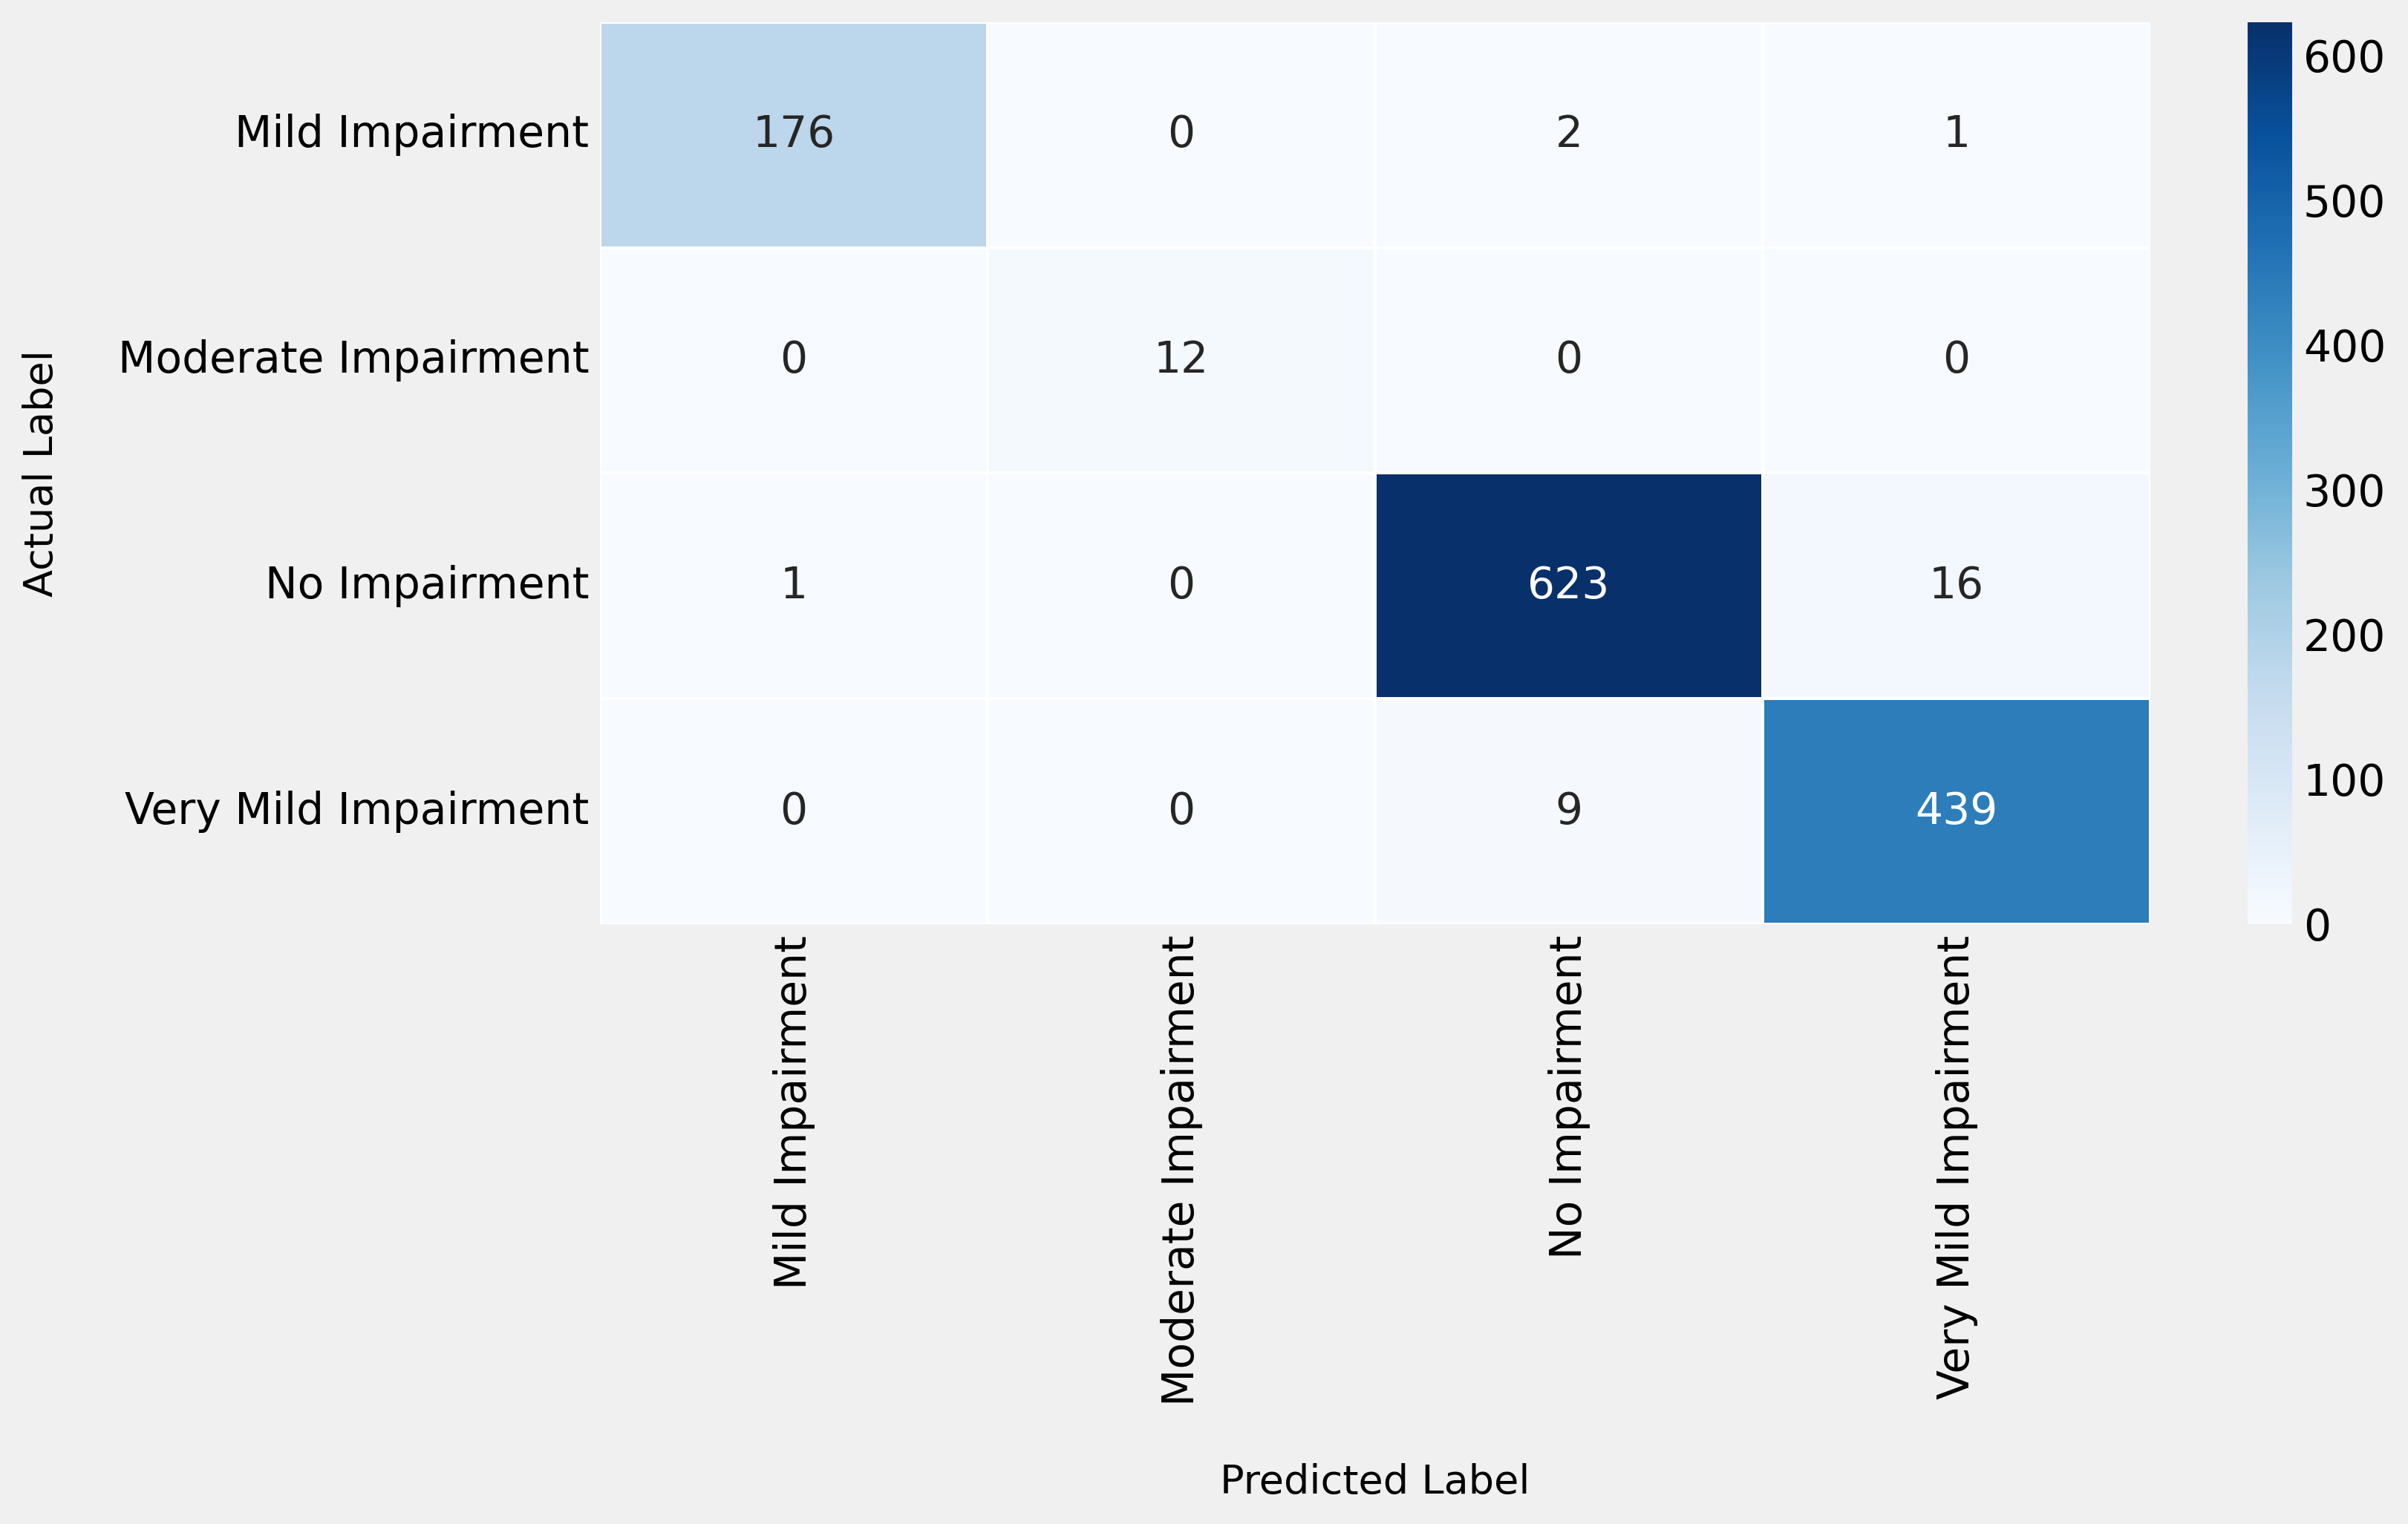

In [102]:
plt.figure(figsize=(10,5))
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

## **11. Classification Report**

This code generates and prints a classification report, providing a comprehensive evaluation of the model's performance on the test set, including precision, recall, F1-score, and support for each class.

---

In [105]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                      precision    recall  f1-score   support

     Mild Impairment       0.99      0.98      0.99       179
 Moderate Impairment       1.00      1.00      1.00        12
       No Impairment       0.98      0.97      0.98       640
Very Mild Impairment       0.96      0.98      0.97       448

            accuracy                           0.98      1279
           macro avg       0.98      0.98      0.98      1279
        weighted avg       0.98      0.98      0.98      1279



## **12. Saving the Model**

This code saves the trained Keras model to a file named 'Alzaheimer_MRI.h5'.

---

In [107]:
model.save('Alzaheimer_MRI.h5')